In [33]:
%matplotlib inline
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# plt.rcParams['figure.figsize'] = (10, 8)

In [34]:
data = np.loadtxt("data.csv", delimiter=',')
print(data.shape)

(41000,)


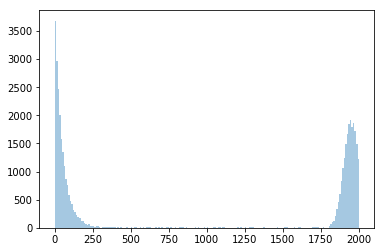

In [35]:
sns.distplot(data, kde=False, bins=200)

0.5743528607739092 0 697.3243835115302


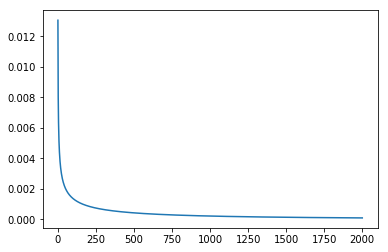

In [36]:
shape, loc, scale = scipy.stats.weibull_min.fit(data, floc=0)
print(shape, loc, scale)
xx = np.linspace(0, 2000, 2000)
yy = scipy.stats.weibull_min.pdf(xx, shape, scale=scale)
plt.plot(xx, yy)

In [37]:
shape, loc, scale = scipy.stats.weibull_min.fit(data, floc=0)
print(shape, loc, scale)

0.5743528607739092 0 697.3243835115302


20004
1.0161531026729098 48.838522696274715


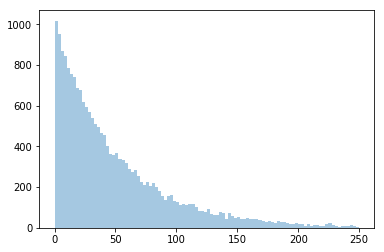

In [38]:
testx = data[(data > 0) & (data < 250)]
print(len(testx))
shape, loc, scale = scipy.stats.weibull_min.fit(testx, floc=0, loc=0)
print(shape, scale)
sns.distplot(testx, kde=False, bins=100)

for d in testx:
    print("INSERT INTO PAL_DISTRIBUTION_FIT_DATA_TBL VALUES (%5.2f);" %d)

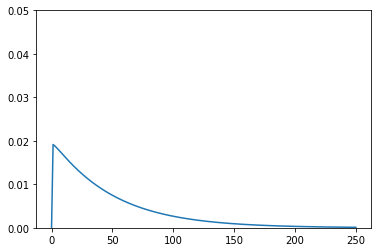

In [39]:
xx = np.linspace(0, 250, 200)
yy = scipy.stats.weibull_min.pdf(xx, shape, scale=scale)
plt.autoscale(enable=False, axis='y')
plt.ylim(0, 0.05)
plt.plot(xx, yy)

20128
59.224128996183865 1953.8029691713364 0


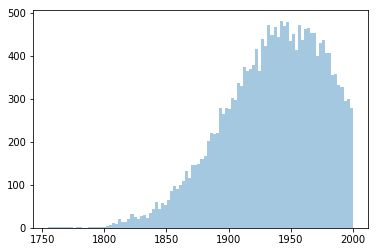

In [40]:
testx = data[(data > 1750) & (data < 2000)]
print(len(testx))
shape, loc, scale = scipy.stats.weibull_min.fit(testx, floc=0, scale=1)
print(shape, scale, loc)
sns.distplot(testx, kde=False, bins=100)

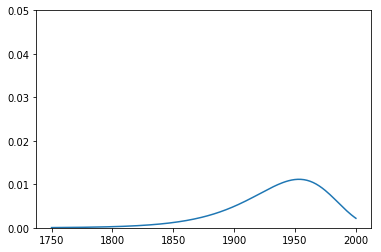

In [41]:
xx = np.linspace(1750, 2000, 200)
yy = scipy.stats.weibull_min.pdf(xx, shape, scale=scale)
plt.autoscale(enable=False, axis='y')
plt.ylim(0, 0.05)
plt.plot(xx, yy)

132
13.989147431673505 902.22913288108 0


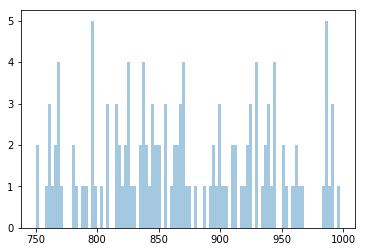

In [42]:
testx = data[(data > 750) & (data < 1000)]
print(len(testx))
shape, loc, scale = scipy.stats.weibull_min.fit(testx, floc=0)
print(shape, scale, loc)
sns.distplot(testx, kde=False, bins=100)

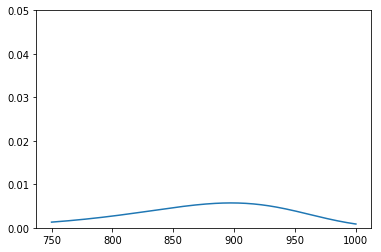

In [43]:
xx = np.linspace(750, 1000, 200)
yy = scipy.stats.weibull_min.pdf(xx, shape, scale=scale)
plt.autoscale(enable=False, axis='y')
plt.ylim(0, 0.05)
plt.plot(xx, yy)

In [44]:
steps = 250
m = 2000
shapes, locs, scales, nums, xaxis = [], [], [], [], []
for start in range(m - steps):
    end = start + steps
    x = data[(data<end) & (data>start)]
    shape, loc, scale = scipy.stats.weibull_min.fit(x, floc=0)
    nums.append(len(x))
    shapes.append(shape)
    locs.append(loc)
    scales.append(scale)
    xaxis.append(end)
    

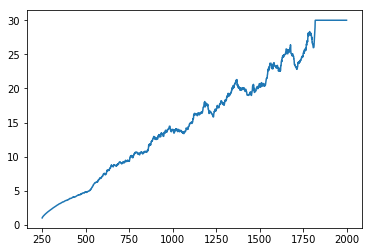

In [45]:
plt.plot(xaxis, np.clip(shapes, 0, 30), label ='shape')